
# Visualización de datos: 1.- Introducción a matplotlib

## Carga de datos y preparación de los dataframes

In [35]:
# INHIBIENDO WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
import numpy as np

In [37]:
covid = pd.read_csv('Datos/covid_19.csv', sep = ';')

print(covid.dtypes)
print()
covid['Date'] = pd.to_datetime(covid['Date'])
print(covid.dtypes)
spain = covid[covid['Country/Region'] == 'Spain']
# spain.to_csv('covid_19_spain.csv', sep = ';', index = False)

Country/Region    object
Date              object
Confirmed          int64
Deaths             int64
dtype: object

Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
dtype: object


In [38]:
spain = spain.sort_values('Date')
#spain['Day'] = range(1,len(spain) + 1)

## Importación de la librería para gráficos

In [39]:
import matplotlib.pyplot as plt

## Documentación sobre la librería

**Documentación** adicional

http://matplotlib.org/api/pyplot_summary.html

http://matplotlib.org/gallery.html

## Gráfico de líneas: plt.plot()

A continuación, pintaremos el número de casos confirmados por Covid-19 en España, para cada día.

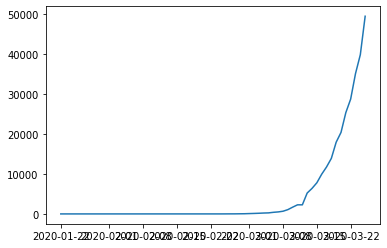

In [40]:
x_values = spain.Date
y_values = spain.Confirmed
plt.plot(x_values, y_values)
plt.show()

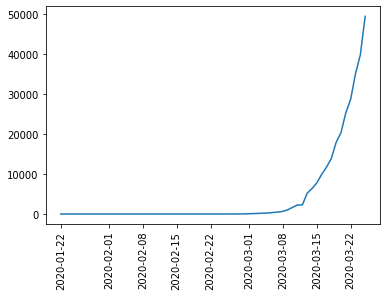

In [41]:
plt.xticks(rotation='vertical') #Rotamos los ticks para poder visualizar las fechas mejor
plt.plot(x_values, y_values)
plt.show()

### Un gráfico con más componentes

Para comprender cuál es la filosofía de trabajo con matplotlib vamos a tratar de crear un **gráfico un poco más completo**. 

Este gráfico tendrá:


   - Una **serie** que contenga el número de **casos confirmados**.

   - Una **serie** que contenga el número de **fallecidos**.
    
   - **Nombres** en ambos **ejes**.
    
   - Una **leyenda** que indique qué linea representa cada función.
   
   - **Cuadros de división** para visualizar mejor las escalas.
   
   - **Título** de gráfico.



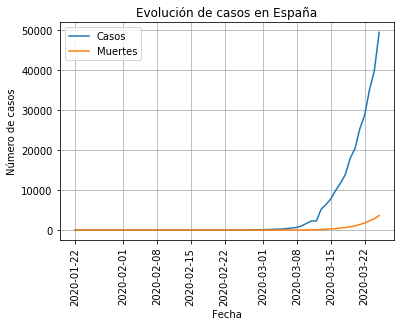

In [42]:
plt.plot(spain['Date'].values,spain['Confirmed'].values,label='Casos')
plt.plot(spain['Date'].values,spain['Deaths'].values,label='Muertes')
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.grid()
plt.legend()
plt.title('Evolución de casos en España')
plt.xticks(rotation='vertical')
plt.show()

### Documentación sobre parámetros

"http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot"

### Modificando el estilo

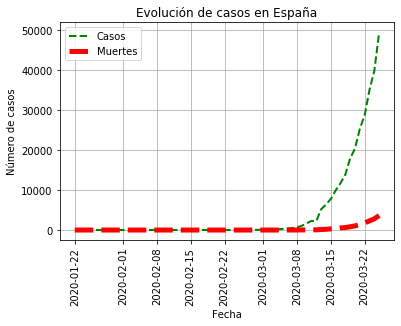

In [43]:
#CAMBIANDO EL ESTILO
plt.plot(spain['Date'].values,spain['Confirmed'].values,label='Casos',color='g',linestyle='dashed',linewidth=2)
plt.plot(spain['Date'].values,spain['Deaths'].values,label='Muertes',color='r',linestyle='dashed',linewidth=5)
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.grid()
plt.legend()
plt.title('Evolución de casos en España')
plt.xticks(rotation='vertical')

plt.show()

## Gráfico de puntos: plt.scatter()

Uno de los gráficos más utilizados es el denominado gráfico de puntos o scatter plot. En este caso, matplotlib nos ofrece la función <b>scatter</b>. Esta función recibirá, como mínimo, un conjunto de valores para el eje de las X y un conjunto de valores para el eje de las Y. 

Adicionalmente, pone a nuestra disposición un conjunto de parámetros que nos permitirán controlar diferentes características visuales de los puntos representados: tamaño, alpha, color, tipo de punto... 

**Documentación**:

"http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter"

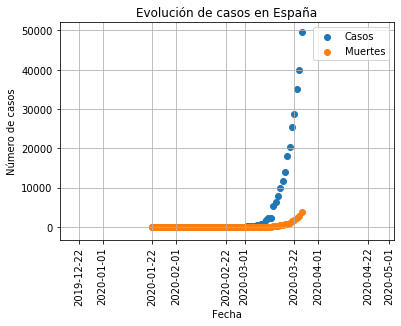

In [44]:
plt.scatter(spain['Date'].values,spain['Confirmed'].values,label='Casos')
plt.scatter(spain['Date'].values,spain['Deaths'].values,label='Muertes')
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.grid()
plt.legend()
plt.title('Evolución de casos en España')
plt.xticks(rotation='vertical')
plt.show()

## Gráfico de barras: plt.bar()

Para la creación de gráficos de barra, matplotlib pone a nuestra disposición dos funciones: <b>bar</b> y <b>barh</b> (en función de la orientación que queramos dar al gráfico). Para su creación tendremos que pasar, de nuevo, el conjunto de valores del eje X y el conjunto de valores del eje Y.

Adicionalmente, como ocurre con gráficos anteriores, dispondremos de parámetros específicos para controlar las diferentes características visuales: barras centradas en su valor, ancho de las barras, ticks a utilizar en cada una de las barras...

**Documentación:**

"http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar">

In [45]:
covid.head()

,Country/Region,Date,Confirmed,Deaths
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0


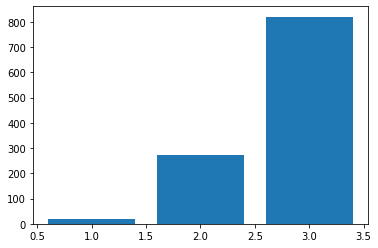

In [46]:
# Gráfico de barras con la media casos por mes (englobando a todos los países)

covid['Month'] = covid.Date.apply(lambda x: x.month) # Se crea una nueva columna 'Month' en la que se extrae el mes de la fecha
covid_mean = covid.groupby('Month', as_index = False).mean()

plt.bar(covid_mean.Month,covid_mean.Confirmed)

plt.show()

### Formato

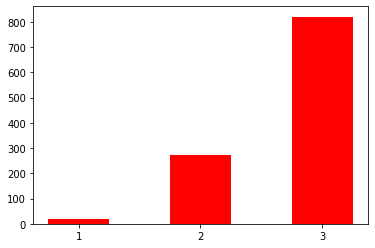

In [47]:
# Establecemos un ancho para las barras y eliminamos los ticks extra

plt.bar(covid_mean.Month, covid_mean.Confirmed, width=0.5, tick_label = ["1", "2", "3"],color='red')
plt.show()

### Orientación

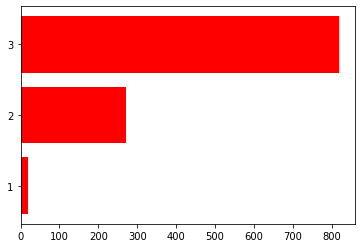

In [48]:
# Cambiamos la orientación del gráfico

plt.barh(covid_mean.Month, covid_mean.Confirmed, height= 0.8, tick_label = ["1", "2", "3"], color = 'red')
plt.show()

### Barras múltiples

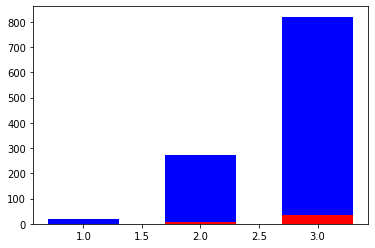

In [49]:
# Gráficos de barras múltiples 

plt.bar(covid_mean.Month, covid_mean.Confirmed, color = "b", width = 0.6)
plt.bar(covid_mean.Month , covid_mean.Deaths, color = "r", width = 0.6)
plt.show()

## Histograma: plt.hist()

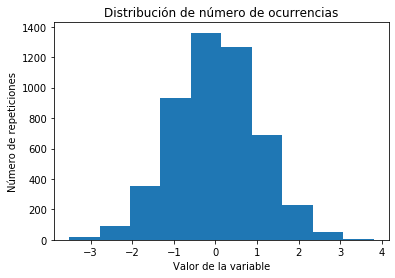

In [52]:
# Generamos bastantes valores aleatorios generados por una distribución normal estándar y los representamos en un histograma.

serie=np.random.randn(5000)
plt.hist(serie)
plt.title('Distribución de número de ocurrencias')
plt.xlabel('Valor de la variable')
plt.ylabel('Número de repeticiones')
plt.show()

**Se puede observar en el gráfico anterior que la muestra proviene de una distribución normal estandar (media 0 y varianza 1 )**

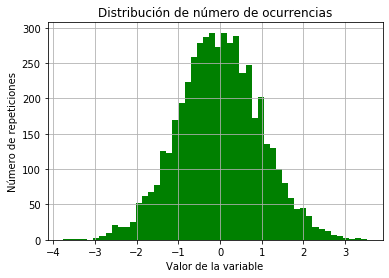

In [54]:
#Modificamos el número de bins 

serie=np.random.randn(5000)
plt.hist(serie,bins=50,color='green')
plt.grid()
plt.title('Distribución de número de ocurrencias')
plt.xlabel('Valor de la variable')
plt.ylabel('Número de repeticiones')
plt.show()

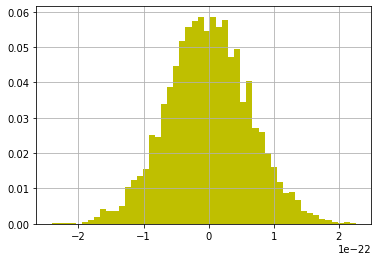

In [60]:
# DISTRIBUCIÓN DE FRECUENCIAS (MEJOR HACERLO CON SEABORN)
serie=serie/len(serie)
#Asignamos el mismo peso a todos los puntos. Como la suma de los pesos es uno obtenemos una distribución de frecuencias.
plt.grid()
plt.hist(serie,bins=50,color='y',weights=np.ones(len(serie)) / len(serie)) 
plt.show()


## Subplots: Varios gráficos en la misma figura

**subplot(nrows, ncols, plot_number)**

**nrows**: The number of rows in the figure.

**ncols**: The number of columns in the figure.

**plot_number**: The placement of the chart (starts at 1).

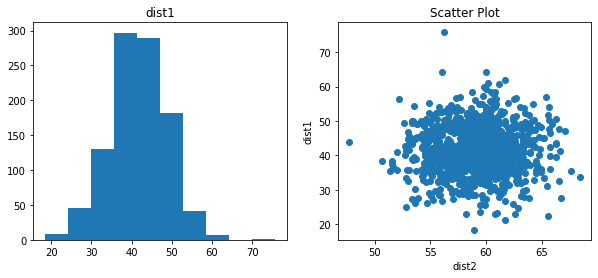

In [61]:
#Generamos muestras de dos distribuciones de probabilidad normales.
dist1 = np.random.normal(42, 7, 1000)
dist2 = np.random.normal(59, 3, 1000)

plt.figure(figsize=(10, 4)) # Se controla el tamaño del gráfico total

plt.subplot(1, 2, 1) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 1 al subplot

plt.hist(dist1)
plt.title('dist1')

plt.subplot(1, 2, 2) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 2 al subplot
plt.scatter(dist2, dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')
plt.title('Scatter Plot');


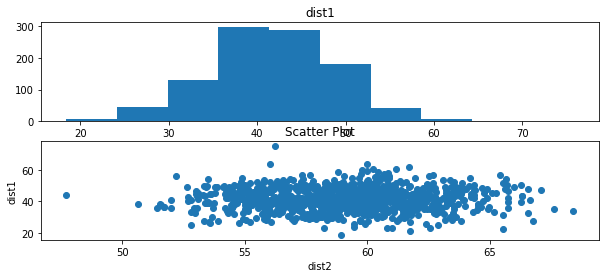

In [62]:
plt.figure(figsize=(10, 4)) # Se controla el tamaño del gráfico total

plt.subplot(2, 1, 1) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 1 al subplot

plt.hist(dist1)
plt.title('dist1')

plt.subplot(2, 1, 2) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 2 al subplot
plt.scatter(dist2, dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')
plt.title('Scatter Plot');